<a href="https://colab.research.google.com/github/OwenHuels/data-science/blob/main/OwenHuelU4proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install "preliz[full,notebook]"

import preliz as pz

import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import arviz as az
import pymc as pm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 514.2/514.2 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.4 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
  Attempting uninstall: nbclient
    Found existing installation: nbclient 0.10.0
    Uninstalling nbclient-0.10.0:
      Successfully uninstalled nbclient-0.10.0


#**Unit 4 Project: NBA Teams' MPG per Player**

##**Context**

Not every NBA team likes to organize their team with the same strategy. Some teams prefer to run everything through their star player or few best players, like the Dallas Mavericks with Luka Doncic. Other teams, like the Celtics, have a relatively balanced roster of players that they shuffle through to outlast the opposing team. I'm going to attempt to make a model see which teams in the NBA utilize more bench depth than others.

We can use the minutes per game (MPG) statistic from the 2023-24 NBA season for this model. If a team's players are averaging relatively few minutes per game, that means they're likely utilizing many more players in their rotation, and thus spreadign minutes more evenly throughout the team. 5 players can be on the court at a time in a basketball game, and 48 total minutes are played in NBA games. This means that the total number of minutes a team has to spread among its players each game is 240.

We will use this minutes per game metric along with the team codes (3 letter sequences that are unique to each team) to create a data set for this model.

Knowing how a team utilizes their bench depth can allow you to make a better game plan for them, either going hard whenever their star players are on the court, or playing a slow, methodical game against teams who prefer to shuffle their players around a lot.

The team codes are as follows, if you're curious about any specific team:

* ATL: Atlanta Hawks
* BOS: Boston Celtics
* BRK: Brooklyn Nets
* CHI: Chicago Bulls
* CHO: Charlotte Hornets
* CLE: Cleveland Cavaliers
* DAL: Dallas Mavericks
* DEN: Denver Nuggets
* DET: Detroit Pistons
* GSW: Golden State Warriors
* HOU: Houston Rockets
* IND: Indiana Pacers
* LAC: Los Angeles Clippers
* LAL: Los Angeles Lakers
* MEM: Memphis Grizzlies
* MIA: Miami Heat
* MIL: Milwaukee Bucks
* MIN: Minnesota Timberwolves
* NOP: New Orleans Pelicans
* NYK: New York Knicks
* OKC: Oklahoma City Thunder
* ORL: Orlando Magic
* PHI: Philadelphia 76ers
* PHO: Phoenix Suns
* POR: Portland Trailblazers
* SAC: Sacramento Kings
* SAS: San Antonio Spurs
* TOR: Toronto Raptors
* UTA: Utah Jazz
* WAS: Washington Wizards

##**Data**

Before we begin to create and test models, here is the raw data and visualization.

In [2]:
#raw data csv from Mr. Arredondo's github
url_nba = 'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/main/Data/basketball2324.csv'

data_nba = pd.read_csv(url_nba)

#view data
data_nba

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,Precious Achiuwa,PF-C,24,TOT,74,18,1624,235,469,0.501,...,191,296,487,97,46,68,83,143,565,achiupr01
1,Bam Adebayo,C,26,MIA,71,71,2416,530,1017,0.521,...,159,578,737,278,81,66,162,159,1367,adebaba01
2,Ochai Agbaji,SG,23,TOT,78,28,1641,178,433,0.411,...,74,142,216,83,47,44,64,117,455,agbajoc01
3,Santi Aldama,PF,23,MEM,61,35,1618,247,568,0.435,...,72,280,352,138,43,54,69,89,654,aldamsa01
4,Nickeil Alexander-Walker,SG,25,MIN,82,20,1921,236,538,0.439,...,35,132,167,204,64,42,76,143,655,alexani01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,Thaddeus Young,PF,35,TOT,33,6,439,65,108,0.602,...,46,57,103,57,23,5,15,49,137,youngth01
568,Trae Young,PG,25,ATL,54,54,1942,433,1008,0.430,...,23,126,149,583,72,11,235,109,1389,youngtr01
569,Omer Yurtseven,C,25,UTA,48,12,545,99,184,0.538,...,72,136,208,29,8,18,37,52,222,yurtsom01
570,Cody Zeller,C,31,NOP,43,0,320,26,62,0.419,...,48,64,112,39,9,5,16,45,76,zelleco01


In [3]:
#division of total minutes and number of games to get MPG
avg_MPG = data_nba.MP / data_nba.G
#adds a column called 'avg_MPG' as the fifth column of cs_data
data_nba.insert(loc=7,column='avg_MPG',value=avg_MPG)

In [4]:
#data with new column
data_nba

,Player,Pos,Age,Tm,G,GS,MP,avg_MPG,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,Precious Achiuwa,PF-C,24,TOT,74,18,1624,21.945946,235,469,...,191,296,487,97,46,68,83,143,565,achiupr01
1,Bam Adebayo,C,26,MIA,71,71,2416,34.028169,530,1017,...,159,578,737,278,81,66,162,159,1367,adebaba01
2,Ochai Agbaji,SG,23,TOT,78,28,1641,21.038462,178,433,...,74,142,216,83,47,44,64,117,455,agbajoc01
3,Santi Aldama,PF,23,MEM,61,35,1618,26.524590,247,568,...,72,280,352,138,43,54,69,89,654,aldamsa01
4,Nickeil Alexander-Walker,SG,25,MIN,82,20,1921,23.426829,236,538,...,35,132,167,204,64,42,76,143,655,alexani01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,Thaddeus Young,PF,35,TOT,33,6,439,13.303030,65,108,...,46,57,103,57,23,5,15,49,137,youngth01
568,Trae Young,PG,25,ATL,54,54,1942,35.962963,433,1008,...,23,126,149,583,72,11,235,109,1389,youngtr01
569,Omer Yurtseven,C,25,UTA,48,12,545,11.354167,99,184,...,72,136,208,29,8,18,37,52,222,yurtsom01
570,Cody Zeller,C,31,NOP,43,0,320,7.441860,26,62,...,48,64,112,39,9,5,16,45,76,zelleco01


In [6]:
#remove TOT players from the data set
data_nba = data_nba.query('Tm != "TOT"')
#reset indexes after removal to make the data look nicer
data_nba.reset_index(drop=True, inplace=True)
#turn the team (Tm) column into categories for each team
data_nba['Tm'] = data_nba['Tm'].astype('category')

**Something important to note:**

The "team" I removed from the data set, TOT, stands for total. What this tag means is that the player was traded mid season, so they accumulated minutes played for multiple different teams. I don't want all of these traded players to be lumped into one "team" called TOT, so I remove them. The main consequence of this, which is unforunate, is that now many data has less total minutes played than there actually are total minutes in the NBA season. This will bias minutes per game to be lower for teams who traded star players mid season, because these players are removed from the data set and don't count towards either team they played for. Overall, I don't think this is going to have too massive of an effect on the model, so I'm just going to do it and move on. If I had more time to manually edit the data, I could split each player between teams they played for to fix this problem.

In [7]:
data_nba

,Player,Pos,Age,Tm,G,GS,MP,avg_MPG,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,Bam Adebayo,C,26,MIA,71,71,2416,34.028169,530,1017,...,159,578,737,278,81,66,162,159,1367,adebaba01
1,Santi Aldama,PF,23,MEM,61,35,1618,26.524590,247,568,...,72,280,352,138,43,54,69,89,654,aldamsa01
2,Nickeil Alexander-Walker,SG,25,MIN,82,20,1921,23.426829,236,538,...,35,132,167,204,64,42,76,143,655,alexani01
3,Grayson Allen,SG,28,PHO,75,74,2513,33.506667,340,682,...,48,247,295,227,69,45,95,157,1014,allengr01
4,Jarrett Allen,C,25,CLE,77,77,2442,31.714286,519,819,...,243,568,811,210,53,81,121,147,1271,allenja01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,Christian Wood,PF,28,LAL,50,1,872,17.440000,123,264,...,39,215,254,49,16,33,50,72,347,woodch01
490,Trae Young,PG,25,ATL,54,54,1942,35.962963,433,1008,...,23,126,149,583,72,11,235,109,1389,youngtr01
491,Omer Yurtseven,C,25,UTA,48,12,545,11.354167,99,184,...,72,136,208,29,8,18,37,52,222,yurtsom01
492,Cody Zeller,C,31,NOP,43,0,320,7.441860,26,62,...,48,64,112,39,9,5,16,45,76,zelleco01


As you can see, we now have a data set containing non-TOT players and with an extra column for each player's MPG statistic.

In [8]:
#this is an array of the nba teams,
#except they are given an int (number) label instead of a string (of three letters)
Tm_idx = data_nba.Tm.cat.codes.values

#an array of the thirty strings that represent position
Tm_codes = data_nba.Tm.cat.categories

#puts coords in a dict, so pymc can read them
nba_coords = {"Tm": Tm_codes}

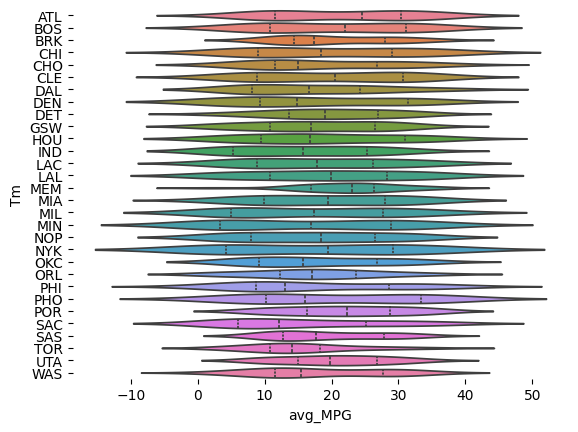

In [9]:
data_nba_graph = data_nba[['Tm', 'avg_MPG']]
#visualize MPG values for all the NBA teams
sns.violinplot(data_nba_graph, x='avg_MPG', y='Tm', inner='quart', hue='Tm')
sns.despine(top=True, right=True, bottom=True, left=True) #removes border box in plot

This plot displays our observed data for each team. I can already see that there's a somewhat significant difference between teams, but our models will tell us more about how significant that difference actually is.

Also, the data seems to go into the negatives and also over 48, which are both values that shouldn't be possible (over 48 is *technically* possible, but has basically never happened before because you would have to play every minute of every game plus overtime, which doesn't usually happen unless your name is Wilt Chamberlain). I'm pretty sure this is just an artifact of how violin plots display data, so I'm just going to ignore it and look at the general trend of the data instead. The models I run in the following section still work, so I don't think there are actually negative values in the data set.

##**Models**

I really have no idea where to start with this data, so I'm just going to try modeling it with a gamma distribution for the likelihood. I think this will work well because gamma is used to model time based events, which MPG is, and it only has positive, continuous values in its support.

Gamma requires two paramaters, mu and sigma (at least using this version of the parameterization).

I know from experience that the average MPG for an NBA player should be around 15 minutes per game. I also think the skew for the mean should be negative, because there will be more random outlier players who only play a couple minutes per game. Therefore, I will pick a weibull distribution, because it has strictly positive support and can have negative skew. For alpha and beta, the parameters of the weibull, I'll pick alpha=10 and beta=15, because this gives be about the shape I'm looking for (see below).

<Axes: >

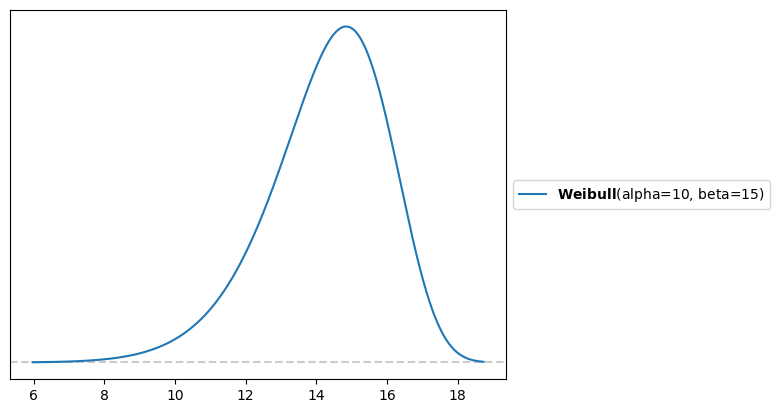

In [10]:
pz.Weibull(alpha=10, beta=15).plot_pdf()

For the sigma hyperprior, I'll just use a halfnormal distribution. Halfnormal has a strictly positive support, which is what sigma needs to be. I want low standard deviations to more prevalent than higher ones, and a halfnormal accomplishes this. I also think that the spread, or variance/standard deviation, of one team will affect the spread of another team, so I want to relate their sigma priors using a hyper prior. Halfnormal only requires one parameter itself, sigma, so my hyperprior for this sigma will also be a halfnormal, with sigma=10.

<Axes: >

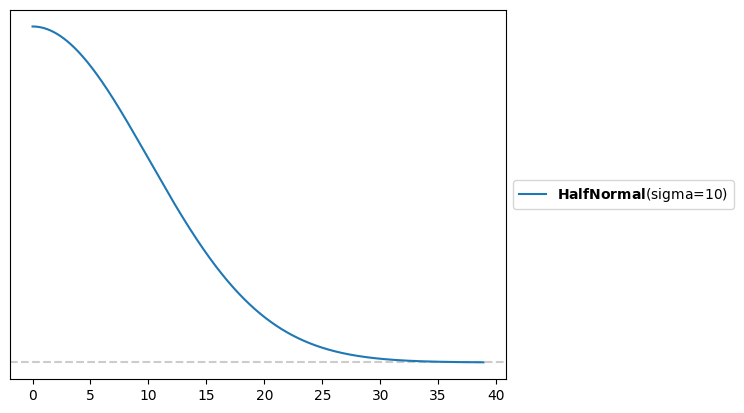

In [11]:
pz.HalfNormal(sigma=10).plot_pdf()

With all of this together, we now have the following model:

In [12]:
with pm.Model(coords=nba_coords) as nba_h_G_model:
    #the hyperprior is shared across all teams
    σ_sd = pm.HalfNormal('σ_sd', sigma = 10)

    #there is a different prior for each team
    #the σ priors 'talk' to one another through σ_sd

    μ = pm.Weibull('μ', alpha = 10, beta = 15, dims = "Tm")

    σ = pm.HalfNormal('σ', sigma = σ_sd,
                      dims = "Tm")

    #likelihood
    y = pm.Gamma('y',
                  sigma = σ[Tm_idx],
                  mu = μ[Tm_idx],
                  observed = data_nba.avg_MPG)

    #nba for NBA, h for hierarchical, G for Gamma
    idata_nba_h_G = pm.sample()

Output()

Output()

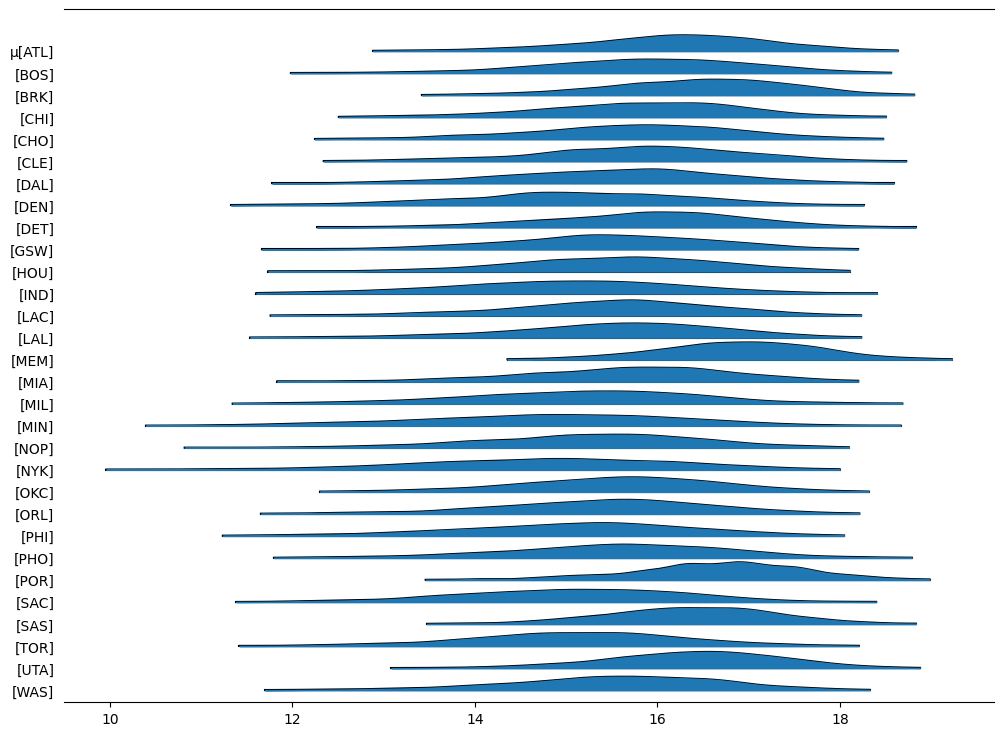

In [13]:
#plots the middle 99.7% of each teams' posterior distribution of the
#mean
axes = az.plot_forest(idata_nba_h_G, kind="ridgeplot",
                      var_names='μ',
                      combined=True, figsize=(12, 9), hdi_prob=0.997)

This ridgeplot is interesting; there's clearly a significant difference between the teams. Let's plot the posterior predictive check to see how well the model reflects the data.

In [14]:
pm.sample_posterior_predictive(idata_nba_h_G, model=nba_h_G_model, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

(0.0, 48.0)

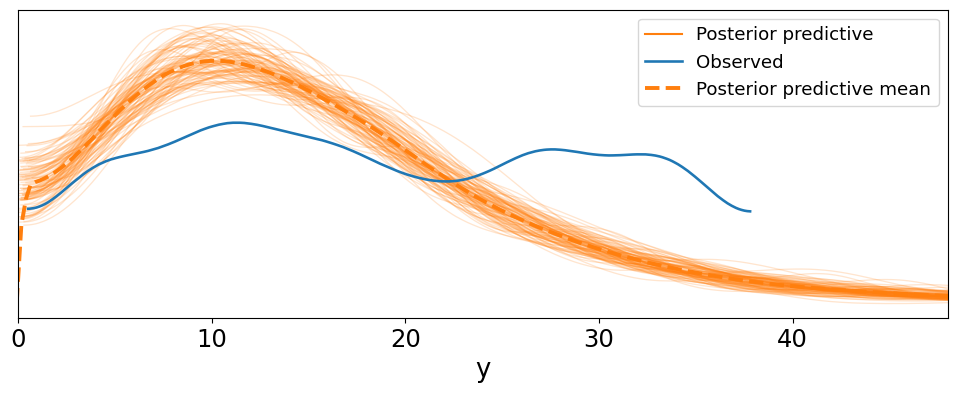

In [15]:
#Plots the posterior predictive density overlaid with a smoothed version of the data

ax = az.plot_ppc(idata_nba_h_G, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])
#need to limit the x axis, so its more readable
ax.set_xlim(0, 48)

Ok, well that didn't go very well. The posterior predictive is completely different than the data we observed. Our data seems to be a lot more flat, but still with tapering off near the extremes. It has this weird valley in the middle that I'm not sure what to do with. I think part of the problem may have been that I assumed every team had the same mean for MPG. This pretty clearly isn't true based on the violin plot of the data that I made at the start. I'll adjust this model to have hyperpriors for mu rather than sigma in order to fix this.

Now that we need hyperpriors for the weibull distribution rather than the halfnormal, we will need two hyperpriors (alpha and beta) instead of one.

Alpha and beta are both strictly positive parameters, so I'll use a gamma distribution for both of their hyperpriors. In the previous model, I used alpha = 10 and beta = 15 for the weibull prior, so I'll pick gamma distribution with means of 10 and 15 respectively to retain values relatively close to what I had before, but now able to learn between different groups. I'm not sure exactly what sigma should be, so I'll just pick 5 for both so that they have the bell curve shape I'm lookign for rather than an exponential shape.

<Axes: >

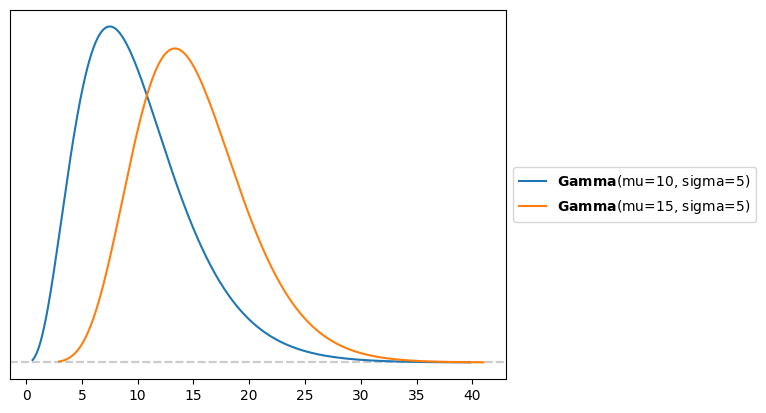

In [27]:
pz.Gamma(mu = 10, sigma = 5).plot_pdf()
pz.Gamma(mu = 15, sigma = 5).plot_pdf()

Now our sigma prior (halfnormal) does not have a hyperior, so we need to assign a value for its parameter, sigma. I'll choose sigma = 10 because that seems like a reasonable value for the variance of MPG.

<Axes: >

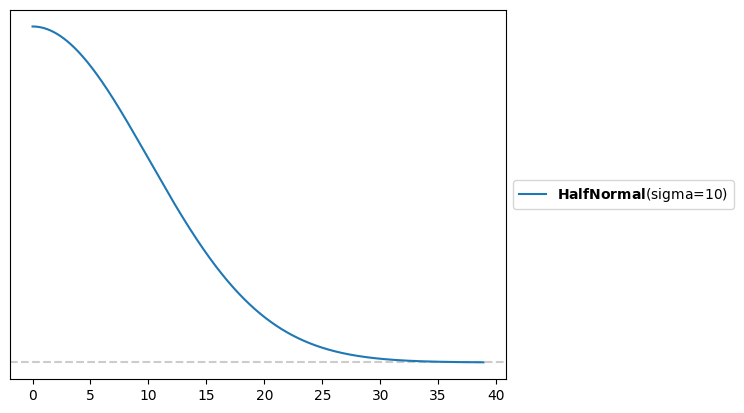

In [36]:
pz.HalfNormal(sigma = 10).plot_pdf()

And the model:

In [32]:
with pm.Model(coords=nba_coords) as nba_h_G_μ_model:
    #the hyperprior is shared across all teams
    μ_a = pm.Gamma('μ_a', mu = 10, sigma = 5)
    μ_b = pm.Gamma('μ_b', mu = 15, sigma = 5)

    #there is a different prior for each team
    #the μ priors 'talk' to one another through μ_mu and μ_sd

    μ = pm.Weibull('μ', alpha = μ_a, beta = μ_b, dims = "Tm")

    σ = pm.HalfNormal('σ', sigma = 10, dims = "Tm")

    #likelihood
    y = pm.Gamma('y',
                  sigma = σ[Tm_idx],
                  mu = μ[Tm_idx],
                  observed = data_nba.avg_MPG)

    #nba for NBA, h for hierarchical, G for Gamma, μ for mu hyperpriors
    idata_nba_h_G_μ = pm.sample(target_accept=0.95)

Output()

Output()

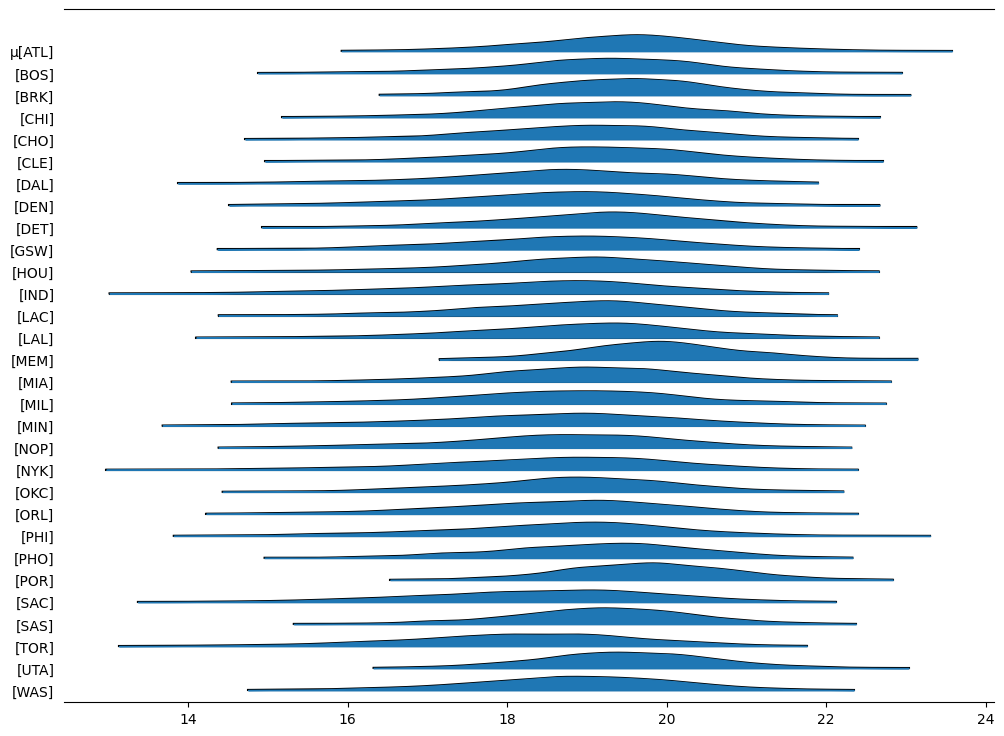

In [58]:
#plots the middle 99.7% of each teams' posterior distribution of the
#mean
axes = az.plot_forest(idata_nba_h_G_μ, kind="ridgeplot",
                      var_names='μ',
                      combined=True, figsize=(12, 9), hdi_prob=0.997)

In [34]:
pm.sample_posterior_predictive(idata_nba_h_G_μ, model=nba_h_G_μ_model, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

(0.0, 48.0)

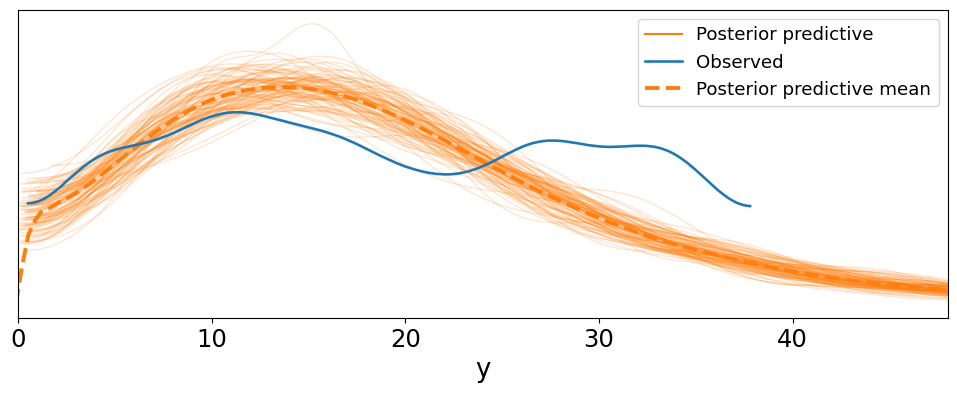

In [35]:
#Plots the posterior predictive density overlaid with a smoothed version of the data

ax = az.plot_ppc(idata_nba_h_G_μ, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])
#need to limit the x axis, so its more readable
ax.set_xlim(0, 48)

This posterior predictive check still isn't amazing, but it is significantly better than the other mode. The mean is pretty close to the observed data until the second hump on the right side of the graph comes about. In comparison to the previous model, the mean isn't super far above the observed like it was before; now it's aligned with the observed relatively well. Because we don't have the knowledge of how to make bimodal distributions yet, I think this model is about the best I'm going to get, and I think it's not too bad.

I'm going to run a non-hierarchical model and see how it compares to the final model I just made. This will allow us to see whether there seems to be dependence between groups or whether they are independent. I'll use the priors from each of the two previous models I ran as the priors here. These are as follows:

<Axes: >

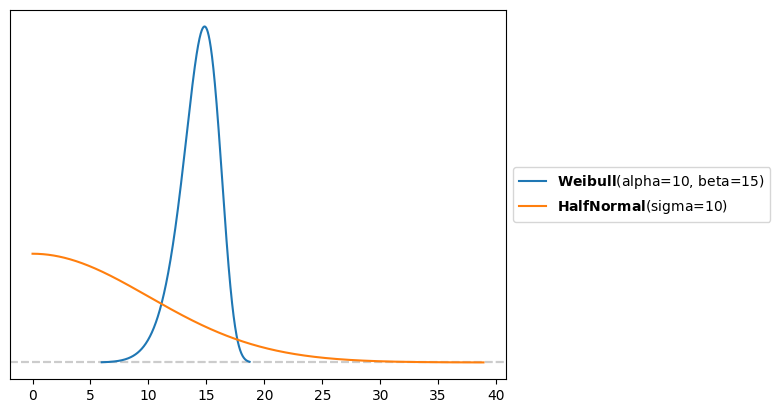

In [41]:
pz.Weibull(alpha = 10, beta = 15).plot_pdf()
pz.HalfNormal(sigma = 10).plot_pdf()

Drum roll please...

In [42]:
with pm.Model(coords=nba_coords) as nba_nh_G_model:

    #there is a different prior for each team
    μ = pm.Weibull('μ', alpha = 10, beta = 15, dims = "Tm")

    σ = pm.HalfNormal('σ', sigma = 10, dims = "Tm")

    #likelihood
    y = pm.Gamma('y',
                  sigma = σ[Tm_idx],
                  mu = μ[Tm_idx],
                  observed = data_nba.avg_MPG)

    #nba for NBA, nh for non-hierarchical, G for Gamma
    idata_nba_nh_G = pm.sample(target_accept=0.95)

Output()

Output()

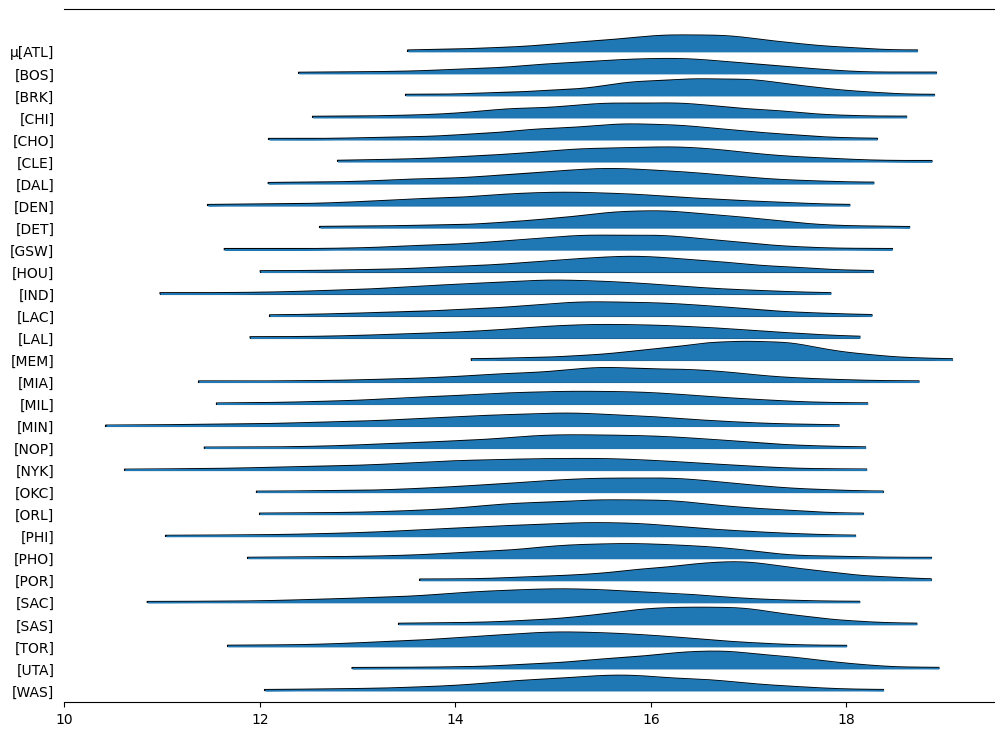

In [57]:
#plots the middle 99.7% of each teams' posterior distribution of the
#mean
axes = az.plot_forest(idata_nba_nh_G, kind="ridgeplot",
                      var_names='μ',
                      combined=True, figsize=(12, 9), hdi_prob=0.997)

In [44]:
pm.sample_posterior_predictive(idata_nba_nh_G, model=nba_nh_G_model, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

(0.0, 48.0)

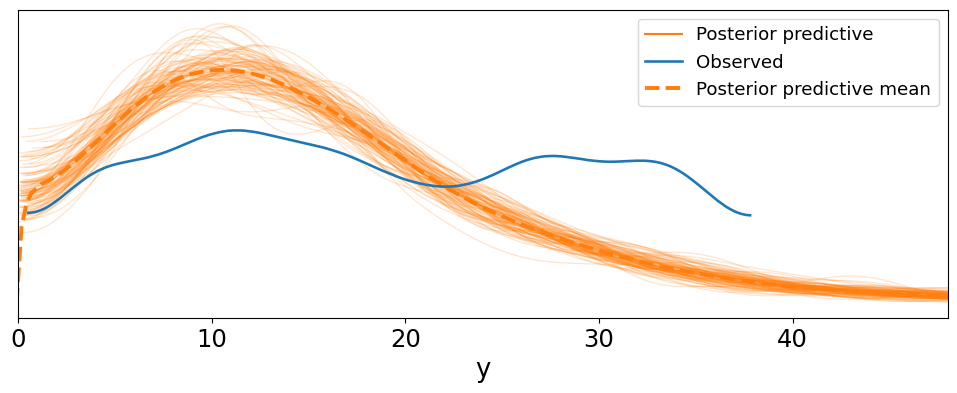

In [45]:
#Plots the posterior predictive density overlaid with a smoothed version of the data

ax = az.plot_ppc(idata_nba_nh_G, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])
#need to limit the x axis, so its more readable
ax.set_xlim(0, 48)

This model doesn't look as good to me, but we can compare using a ridge plot.

array([<Axes: >], dtype=object)

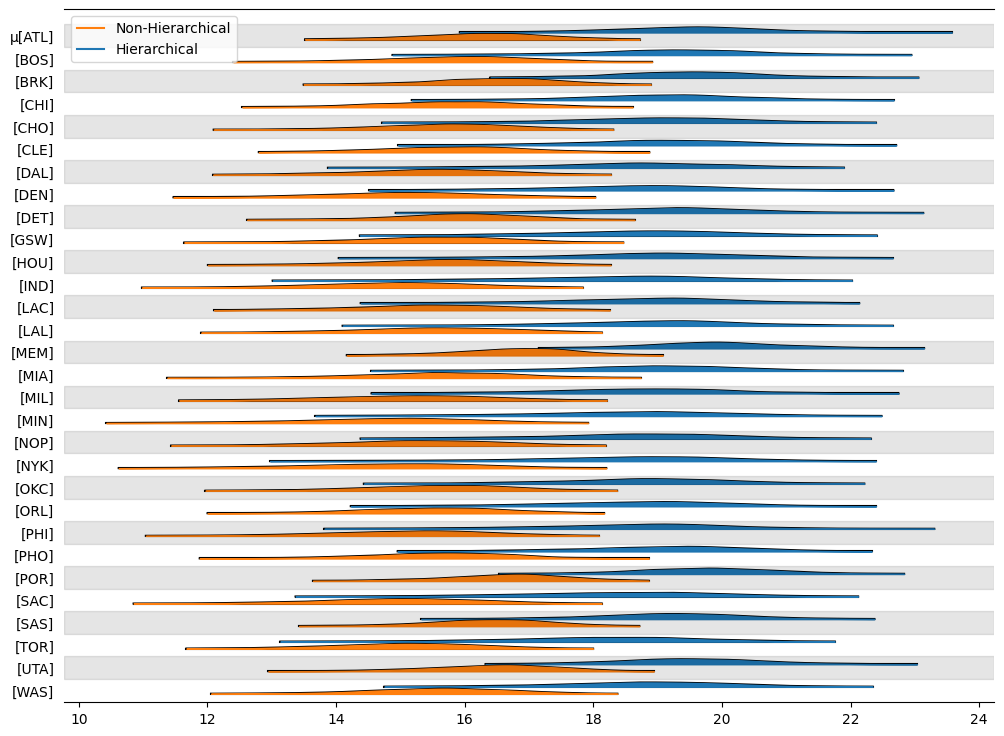

In [56]:
#plots the middle 99.7% of each teams' posterior distribution of the mean
az.plot_forest([idata_nba_h_G_μ,idata_nba_nh_G], kind="ridgeplot",
                      var_names='μ', model_names=['Hierarchical','Non-Hierarchical'],
                      combined=True, figsize=(12, 9), hdi_prob=0.997)

The hierarchical model brought the distribution for each team way higher than it was for the non-hierarchical model. My initial guess of the average minutes per game of a player being 15 seems to have been lower than it should be, which can be seen from the posterior predicative checks where the observed data has basically equal prevalence on either side of 20. Because of this, I think the hierarchical model is probably a better model of what is really going on in the data, so there is some dependence between groups.

We can also check the rhat and trace values of my final model to see if anything went disasterously wrong or if there is any new information to glean.

array([[<Axes: title={'center': 'μ'}>, <Axes: title={'center': 'μ'}>],
       [<Axes: title={'center': 'μ_a'}>, <Axes: title={'center': 'μ_a'}>],
       [<Axes: title={'center': 'μ_b'}>, <Axes: title={'center': 'μ_b'}>],
       [<Axes: title={'center': 'σ'}>, <Axes: title={'center': 'σ'}>]],
      dtype=object)

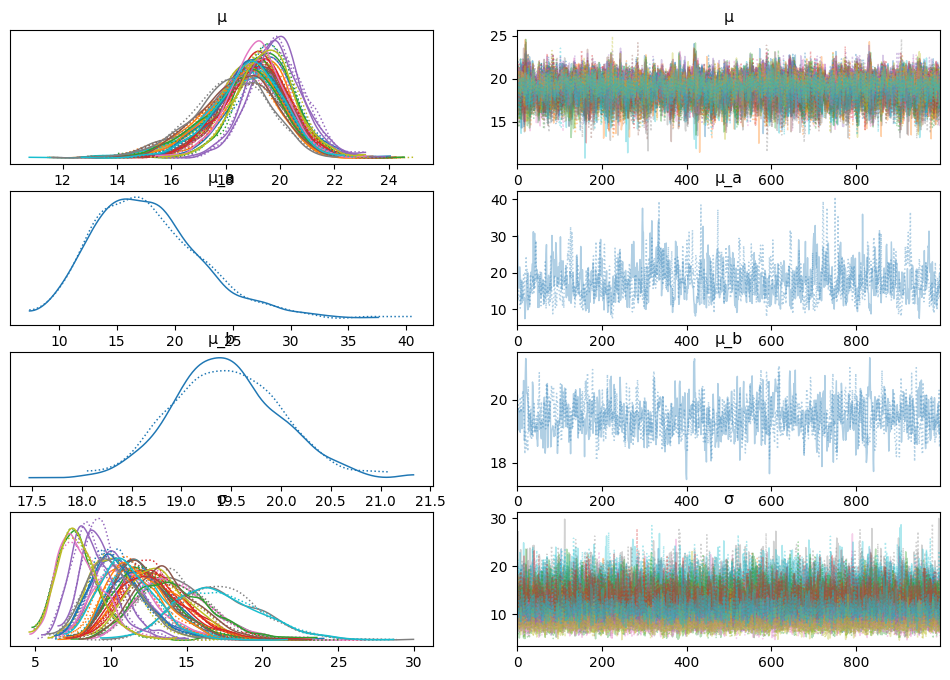

In [49]:
az.plot_trace(idata_nba_h_G_μ)

These chains all okay, they're a little bit sparce because I set the target accept to 0.95, but nothing terrible. The rhat values (below) tell us that nothing went terribly wrong, so these chains are fine.

In [51]:
az.rhat(idata_nba_h_G_μ)

<xarray.Dataset> Size: 856B
Dimensions:  (Tm: 30)
Coordinates:
  * Tm       (Tm) <U3 360B 'ATL' 'BOS' 'BRK' 'CHI' ... 'SAS' 'TOR' 'UTA' 'WAS'
Data variables:
    μ        (Tm) float64 240B 1.002 1.002 1.001 1.0 1.0 ... 1.005 1.0 1.0 1.0
    μ_a      float64 8B 1.001
    μ_b      float64 8B 1.001
    σ        (Tm) float64 240B 1.001 1.002 1.004 1.001 ... 1.002 1.0 0.9994

The rhat values are all with 0.01 of 1, which means that our model ran very well. Nothing notable to report.

Also, here's the posterior plot of our final model.

array([[<Axes: title={'center': 'μ\nATL'}>,
        <Axes: title={'center': 'μ\nBOS'}>,
        <Axes: title={'center': 'μ\nBRK'}>],
       [<Axes: title={'center': 'μ\nCHI'}>,
        <Axes: title={'center': 'μ\nCHO'}>,
        <Axes: title={'center': 'μ\nCLE'}>],
       [<Axes: title={'center': 'μ\nDAL'}>,
        <Axes: title={'center': 'μ\nDEN'}>,
        <Axes: title={'center': 'μ\nDET'}>],
       [<Axes: title={'center': 'μ\nGSW'}>,
        <Axes: title={'center': 'μ\nHOU'}>,
        <Axes: title={'center': 'μ\nIND'}>],
       [<Axes: title={'center': 'μ\nLAC'}>,
        <Axes: title={'center': 'μ\nLAL'}>,
        <Axes: title={'center': 'μ\nMEM'}>],
       [<Axes: title={'center': 'μ\nMIA'}>,
        <Axes: title={'center': 'μ\nMIL'}>,
        <Axes: title={'center': 'μ\nMIN'}>],
       [<Axes: title={'center': 'μ\nNOP'}>,
        <Axes: title={'center': 'μ\nNYK'}>,
        <Axes: title={'center': 'μ\nOKC'}>],
       [<Axes: title={'center': 'μ\nORL'}>,
        <Axes: title={'ce

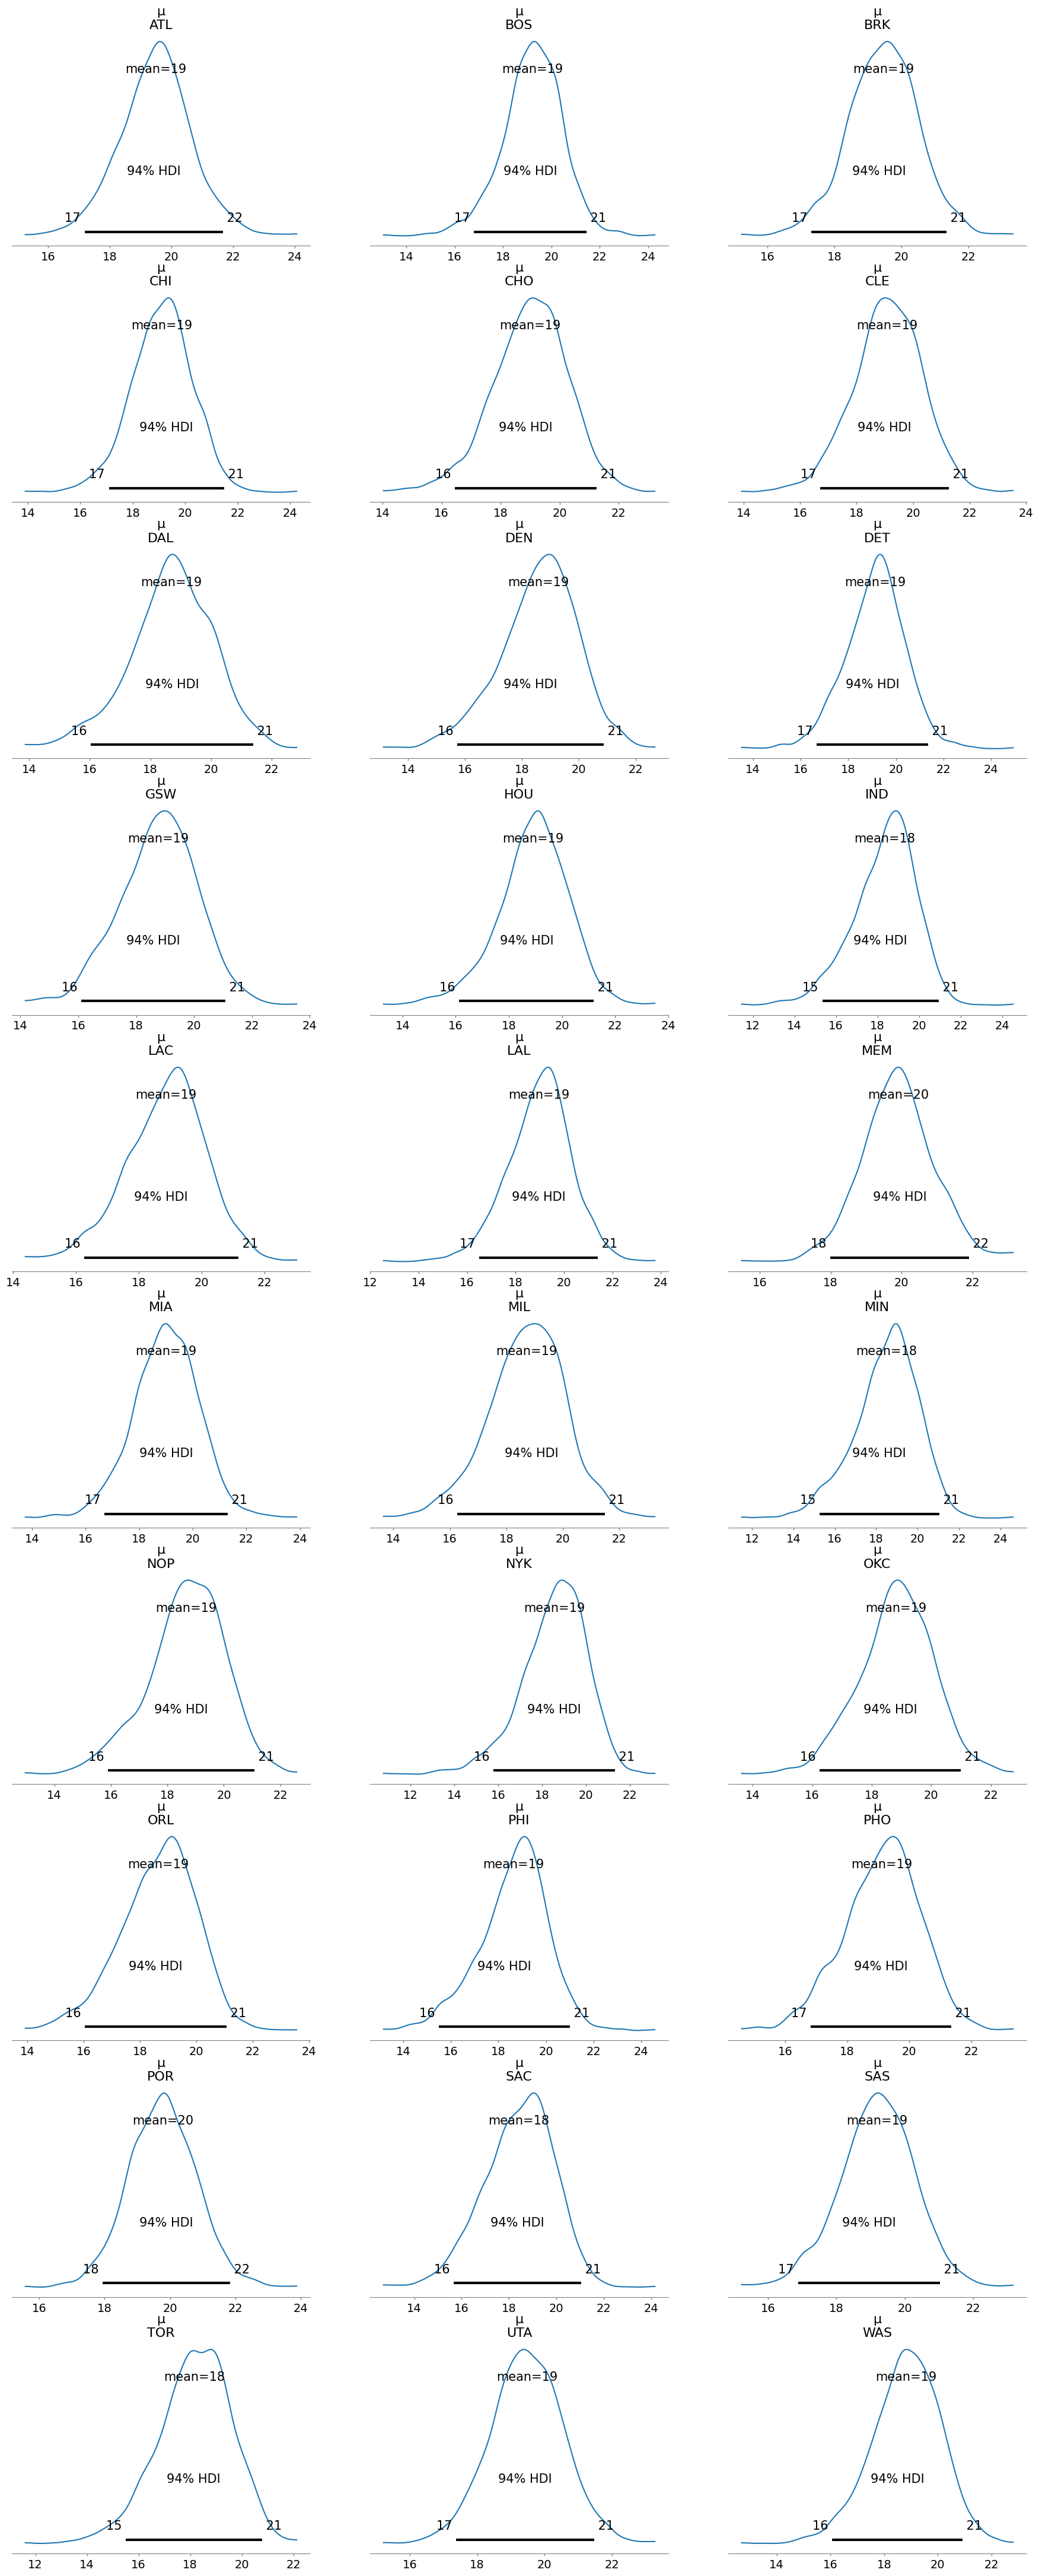

In [54]:
az.plot_posterior(idata_nba_h_G_μ, var_names='μ')

##**Conclusion**

This model doesn't have very good predictive power for what the data is showing, but overall, I think that the final model I got to is probably a pretty good model of the true distribution of average MPG, and here's why:

At the beginning, I took out traded (TOT) players from the data set in order to make the data easier to work with. In the NBA, most of the players traded mid season tend to be middle of the rotation players swapped between teams, rather than star players or completely irrelevant players. These players are traded because their price often isn't very high, and they also provide significant value to a contending team while not being a major loss for the team trading them away. The effect this had on my data was that it removed a lot of players who had a middling (15-25 MPG) from the data set, resulting in the data looking bimodal, as we can see in the ppc. I think that if you didn't remove these players and instead split their MPG between the teams they played for, this would fill in the gap in the middle of the data that it causing it to be bimodal. In this case, my model would fit the data very well, so I actually trust the prediction my model made to be a better reflection of the true distribution more than I trust the observed data.

Some specific teams that we can make inferences about based on this model are for teams that were pretty bad last season, like the Memphis Grizzlies, Brooklyn Nets, Portland Trailblazers, and more. These teams have a much lower variance in their average MPG than most teams across the league do. This makes a lot of sense to me because bad teams don't tend to have a few star players that play most of the minutes, instead they spread minutes very evenly among players they are tryign to develop, resulting in a regression of average MPG on their rosters towards the mean.

Teams like the New York Knicks and Indiana Pacers have way more variance than most teams have. This is probably another artifact of me removing traded players from the data, as both the Knicks and Pacers were involved in trading for low level star players OG Anunoby and Pascal Siakam respectively. Both Anunoby and Siakam play a lot of MPG, so removing the from the data set skewed the Knicks and Pacers data a lot.

I would be very interested to try doing two things differently with this model:

First, I would like to change the data set so that I don't have to just exodus all of the TOT players and instead split their minutes between teams they played for. This would make my model a lot more accurate to the actual data collected.

Second, if this new data is still bimodal like it appears to be now, I would like to revisit this data set whenever I have knowledge of how to use bimodal distributions in a model. It woukd be really interesting to see and analyze why MPG is bimodal, if it indeed is.

The fact that the hierarchical and non-hierarchical models were so different is very interesting to me. It might just be because removing players that were traded resulted in a very strong dependence between teams, as players removed from one team literally directly corresponds to players removed from another team. It also could be because my guess of what the average MPG is across the NBA was 15, which is probably a lot lower than a should have guess. The hierarchical model was able to correct for this incorrect guess, but the non-hierarchical couldn't adjust as much, resulting in vastly different results.